In [249]:
import pandas as pd
import numpy as np

HPP = pd.read_csv('../input/house-price-prediction-challenge/train.csv')
HPP.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [250]:
HPP.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [251]:
HPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [252]:
HPP['ADDRESS'].unique()
print(len(HPP['ADDRESS'].unique()))

6899


In [253]:
HPP['POSTED_BY'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [254]:
HPP['BHK_OR_RK'].unique()

array(['BHK', 'RK'], dtype=object)

In [255]:
#HPP = HPP[: 900]

In [256]:
X = HPP.iloc[ : , 0 : 11]

In [257]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911


In [258]:
X.drop('ADDRESS', inplace = True, axis = 1)

In [259]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911


In [260]:
y = HPP['TARGET(PRICE_IN_LACS)']

In [261]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, handle_unknown = 'error', drop = 'first')
PB = np.array(X['POSTED_BY'])
PB = PB.reshape(-1, 1)
PB_df = pd.DataFrame(encoder.fit_transform(PB))
PB_df.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [262]:
X = X.join(PB_df)
X.drop('POSTED_BY', inplace = True, axis = 1)
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,0.0,1.0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,1.0,0.0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,0.0,1.0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,0.0,1.0
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,1.0,0.0


In [263]:
BHRK = pd.get_dummies(X['BHK_OR_RK'], prefix = 'B', drop_first = True)
X = pd.concat([X,BHRK], axis = 1)

In [264]:
BHRK.head()

,B_RK
0,0
1,0
2,0
3,0
4,0


In [265]:
BHRK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   B_RK    29451 non-null  uint8
dtypes: uint8(1)
memory usage: 28.9 KB


In [266]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,0.0,1.0,0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,1.0,0.0,0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,0.0,1.0,0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,0.0,1.0,0
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,1.0,0.0,0


In [267]:
X['B_RK'].unique()

array([0, 1], dtype=uint8)

In [268]:
X['B_RK'].value_counts()

0    29427
1       24
Name: B_RK, dtype: int64

In [269]:
X.drop('BHK_OR_RK', inplace = True, axis = 1)

In [270]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0.0,1.0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1.0,0.0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0.0,1.0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0.0,1.0,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,1.0,0.0,0


In [271]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [272]:
scaler = MinMaxScaler()

k = np.array(X['SQUARE_FT'])
k= k.reshape(-1, 1)
K = scaler.fit_transform(k)

X['SQUARE_FT'] = K

In [273]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,0.000005,1,1,12.969910,77.597960,0.0,1.0,0
1,0,0,2,0.000005,1,1,12.274538,76.644605,1.0,0.0,0
2,0,0,2,0.000004,1,1,12.778033,77.632191,0.0,1.0,0
3,0,1,2,0.000004,1,1,28.642300,77.344500,0.0,1.0,0
4,1,0,2,0.000004,0,1,22.592200,88.484911,1.0,0.0,0


In [274]:
k = np.array(X['LONGITUDE'])
k= k.reshape(-1, 1)
K = scaler.fit_transform(k)

X['LONGITUDE'] = K

In [275]:
k = np.array(X['LATITUDE'])
k= k.reshape(-1, 1)
K = scaler.fit_transform(k)

X['LATITUDE'] = K

In [276]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,0.000005,1,1,0.519154,0.725671,0.0,1.0,0
1,0,0,2,0.000005,1,1,0.512032,0.722201,1.0,0.0,0
2,0,0,2,0.000004,1,1,0.517189,0.725796,0.0,1.0,0
3,0,1,2,0.000004,1,1,0.679690,0.724748,0.0,1.0,0
4,1,0,2,0.000004,0,1,0.617717,0.765300,1.0,0.0,0


In [277]:
X2 = pd.DataFrame({
                  'Latitude' : X['LATITUDE'],
                  'Longitude' : X['LONGITUDE']
})

In [278]:
X2.head()

,Latitude,Longitude
0,0.725671,0.519154
1,0.722201,0.512032
2,0.725796,0.517189
3,0.724748,0.679690
4,0.765300,0.617717


<AxesSubplot:xlabel='clusters', ylabel='inertia'>

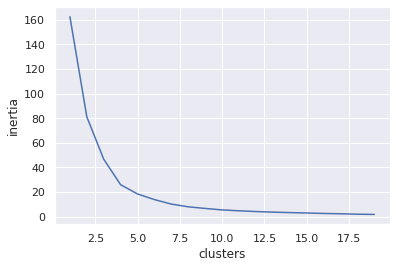

In [279]:
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

inertia = []

for i in range(1, 20):
    model = KMeans(n_clusters = i, init = 'k-means++')
    model.fit(X2)
    inertia.append(model.inertia_)
    
data_df = pd.DataFrame({'clusters' : np.arange(1, 20, 1),
                       'inertia' : inertia
                       })

sns.lineplot(x = 'clusters', y = 'inertia', data = data_df)

In [280]:
model2 = KMeans(n_clusters = 8, init = 'k-means++', random_state = 1)

AllClusters = model2.fit_predict(X2)
AllClusters

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

In [281]:
X2['AllClusters'] = AllClusters

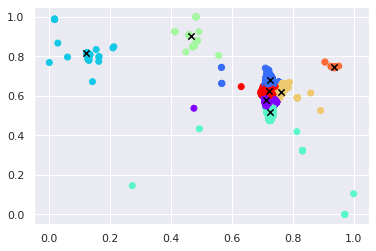

In [292]:
import matplotlib.pyplot as plt

plt.scatter(x = 'Latitude', y = 'Longitude', c = 'AllClusters', data = X2, cmap = 'rainbow')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s = 40, c = 'black', 
            marker = 'x', label = 'Centroids')